In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-24 22:21:45,979 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:45,981 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:45,982 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:21:45,982 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:45,983 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:45,984 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:21:45,988 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-24 22:21:46,621 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:21:46,682 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:46,683 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:46,684 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:21:46,685 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:21:47,359 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:21:47,413 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:47,413 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:47,414 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:21:47,415 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:47,415 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:47,416 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-24 22:21:48,316 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-24 22:21:48,317 - settings - Setting database.user to celiib
INFO - 2021-06-24 22:21:48,318 - settings - Setting database.password to newceliipass
INFO - 2021-06-24 22:21:48,319 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-24 22:21:49,126 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [5]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [6]:
"""
Pseudocode: 
1) Check if there are multiple somas associated with that segment

"""

'\nPseudocode: \n1) Check if there are multiple somas associated with that segment\n\n'

In [7]:
axon_segs = dj.U("segment_id") & (minnie.DecompositionAxon() 
                      & minnie.AutoProofreadValidationSegment4() - minnie.AutoProofreadValidationSegmentExclude4() )
axon_segs

segment_id segment id unique within each Segmentation


In [8]:
"""
Pseudocode: 
1) Find the coordinates of the nucleus for that new segment
2) Make sure that same number of DecompositionAxon objects as in Decomposition
3) Pick the neuron object that is closest and within a certain range of the nucleus
4) Download the neuron object
5) Run the proofreading
6) Save off the validation df
"""

'\nPseudocode: \n1) Find the coordinates of the nucleus for that new segment\n2) Make sure that same number of DecompositionAxon objects as in Decomposition\n3) Pick the neuron object that is closest and within a certain range of the nucleus\n4) Download the neuron object\n5) Run the proofreading\n6) Save off the validation df\n'

In [9]:
val_table = minnie.AutoProofreadValidationScore6() * minnie.AutoProofreadValidationSegmentMap4()
val_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5280,7,39,4,0.9926677946982515,0.9992429977289932,0.995944543996982,530.88,864691135585319036,True,True,full,1,0,0,0,
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3416,3853,0,0.0002594706798131811,1.0,0.0005188067444876783,384.12,864691135538120050,True,True,full,2,0,0,0,
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,148.89,864691135564655959,True,True,full,1,0,0,0,
88.00,230236,864691135609687047,0.08,0,=BLOB=,1401.7516788382673,=BLOB=,=BLOB=,31,552,9,19,0.775,0.62,0.6888888888888889,1960,22,1,2,0.9994900560938297,0.9989806320081549,0.99923527912312,709.59,864691135748568361,True,True,full,1,0,0,0,
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,974,0,6,nan,0.0,nan,2750,2333,3,48,0.9989102796948783,0.9828448892065761,0.9908124662223023,574.58,864691135758569550,True,True,full,2,0,2,0,
88.00,258307,864691135293126156,0.08,0,=BLOB=,639.4047428112395,=BLOB=,=BLOB=,7,342,10,63,0.4117647058823529,0.1,0.16091954022988506,2983,7,25,20,0.991688829787234,0.9933399933399933,0.9925137248377973,401.35,864691136194042326,True,True,full,1,0,0,0,
88.00,262773,864691136023889209,0.08,0,=BLOB=,183.47810007157142,=BLOB=,=BLOB=,10,47,2,0,0.8333333333333334,1.0,0.9090909090909091,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,110.48,864691135233108569,True,True,full,1,0,0,0,
88.00,264870,864691136951664863,0.08,0,=BLOB=,1173.2836052703515,=BLOB=,=BLOB=,29,399,25,3,0.5370370370370371,0.90625,0.6744186046511628,2008,26,3,33,0.9985082048731975,0.9838314551690348,0.9911154985192497,506.46,864691135740225387,True,True,full,1,0,0,0,
88.00,269247,864691135584074360,0.08,0,=BLOB=,2117.67420548353,=BLOB=,=BLOB=,215,10,4,55,0.9817351598173516,0.7962962962962963,0.8793456032719836,805,0,7,66,0.9913793103448276,0.9242250287026407,0.9566250742721331,544.03,864691136105498585,True,True,full,1,0,0,0,
88.00,269380,864691135974639471,0.08,0,=BLOB=,444.913697558688,=BLOB=,=BLOB=,28,257,4,10,0.875,0.7368421052631579,0.7999999999999999,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,186.86,864691134988386682,True,True,full,1,0,0,0,


In [10]:
bad_presyn_table = (minnie.AutoProofreadValidationScore6() & "pre_fp>20")
bad_presyn_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,264870,864691136951664863,0.08,0,=BLOB=,1173.2836052703515,=BLOB=,=BLOB=,29,399,25,3,0.5370370370370371,0.90625,0.6744186046511628,2008,26,3,33,0.9985082048731975,0.9838314551690348,0.9911154985192497,506.46
88.00,301095,864691135446675028,0.08,0,=BLOB=,1038.6457425891272,=BLOB=,=BLOB=,11,374,27,4,0.2894736842105263,0.7333333333333333,0.4150943396226416,3322,8,6,27,0.9981971153846154,0.9919378919080323,0.9950576606260296,412.56
88.00,335175,864691135367058169,0.08,0,=BLOB=,1608.8214321201817,=BLOB=,=BLOB=,12,172,23,0,0.34285714285714286,1.0,0.5106382978723404,2216,8,6,25,0.9972997299729973,0.9888442659526997,0.9930539995518709,434.61
88.00,493968,864691135117980637,0.08,0,=BLOB=,2186.513987649549,=BLOB=,=BLOB=,61,605,42,1,0.5922330097087378,0.9838709677419355,0.7393939393939394,3600,2,49,3,0.9865716634694437,0.9991673605328892,0.9928295642581357,596.85
88.00,518853,864691135415666362,0.08,0,=BLOB=,3396.544149491793,=BLOB=,=BLOB=,308,466,43,27,0.8774928774928775,0.9194029850746268,0.8979591836734694,9304,4,3,5,0.9996776619748576,0.99946288537974,0.9995702621400945,1024.26
88.00,554741,864691135761634358,0.08,0,=BLOB=,2235.2028254704464,=BLOB=,=BLOB=,84,231,22,16,0.7924528301886793,0.84,0.8155339805825242,2993,2,0,2,1.0,0.9993322203672788,0.9996659986639946,675.41
88.00,583739,864691136334080435,0.08,0,=BLOB=,1340.0547232403364,=BLOB=,=BLOB=,38,61,27,0,0.5846153846153846,1.0,0.7378640776699029,5430,4,2,13,0.9996318114874816,0.9976116112437994,0.9986206896551724,599.69
88.00,583848,864691135497743635,0.08,0,=BLOB=,3466.00473902359,=BLOB=,=BLOB=,87,300,30,30,0.7435897435897436,0.7435897435897436,0.7435897435897437,6886,34,11,88,0.9984051036682615,0.9873817034700315,0.9928628072957969,1140.96


In [ ]:
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>100")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
bad_postsyn_table = (minnie.AutoProofreadValidationScore5() & "post_fn>200")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
import datajoint as dj
dj.config["display.limit"] = 30
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>10")
bad_presyn_seg_ids = bad_presyn_table.fetch("segment_id")
bad_presyn_table

In [ ]:
# multi_soma_keys = (minnie.AutoProofreadValidationSegmentMap4() & "n_somas>1"
#                       & minnie.DecompositionAxon.proj(old_segment_id="segment_id")
#                   & dict(segment_id = 864691135415710906)).proj().fetch(as_dict=True)
# key = multi_soma_keys[0]
# key

In [11]:
segment_id = 864691135584074360
segment_id = 864691135517422218
segment_id = 864691136951664863
segment_id = 864691135446675028
segment_id = 864691135367058169
segment_id = 864691135117980637
segment_id = 864691135761634358
segment_id = 864691136334080435
key = dict(segment_id=segment_id)

In [12]:
verbose = True

segment_id = key["segment_id"]
if verbose:
    print(f"\n-- Working on neuron {segment_id}---")

segment_map_dict = (minnie.AutoProofreadValidationSegmentMap4() & dict(segment_id=segment_id)).fetch1()

#1) Find the coordinates of the nucleus for that new segment
nucleus_id = segment_map_dict["nucleus_id"]
nuc_center_coords = du.nuclei_id_to_nucleus_centers(nucleus_id)
if verbose:
    print(f"nuc_center_coords = {nuc_center_coords}")

#2) Make sure that same number of DecompositionCellType objects as in Decomposition
old_segment_id = segment_map_dict["old_segment_id"]
if verbose:
    print(f"old_segment_id = {old_segment_id}")

search_key = dict(segment_id=old_segment_id)
n_somas = len(minnie.BaylorSegmentCentroid() & search_key)
n_decomp_axon = len(minnie.DecompositionCellType() & search_key)
if verbose:
    print(f"# of somas = {n_somas} and # of DecompositionCellType = {n_decomp_axon}")


if n_somas != n_decomp_axon:
    raise Exception(f"# of somas = {n_somas} NOT MATCH # of DecompositionCellType = {n_decomp_axon}")

#3) Pick the neuron object that is closest and within a certain range of the nucleus
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(old_segment_id)
if n_somas > 1:
    """
    Finding the closest soma:
    1) For each neuron object get the mesh center of the soma object
    2) Find the distance of each from the nucleus center
    3) Find the arg min distance and make sure within threshold
    4) Mark the current neuron and the current split index
    """
    nuclei_distance_threshold = 15000

    soma_center_coords = [k["S0"].mesh_center for k in neuron_objs]
    soma_distances = [np.linalg.norm(k-nuc_center_coords) for k in soma_center_coords]
    min_dist_arg = np.argmin(soma_distances)
    min_dist = soma_distances[min_dist_arg]

    if verbose:
        print(f"soma_distances = {soma_distances}")
        print(f"min_dist_arg = {min_dist_arg}, with min distance = {min_dist}")

    if min_dist > nuclei_distance_threshold:
        raise Exception(f"min_dist ({min_dist}) larger than nuclei_distance_threshold ({nuclei_distance_threshold})")

    neuron_obj = neuron_objs[min_dist_arg]
    split_index = split_idxs[min_dist_arg]

    if verbose:
        print(f"Winning split_index = {split_index}")
else:
    split_index = split_idxs[0]
    neuron_obj = neuron_objs[0]

    


-- Working on neuron 864691136334080435---
nuc_center_coords = [1373888  510656  720640]
old_segment_id = 864691135508720393
# of somas = 1 and # of DecompositionCellType = 1
**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [13]:
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                filter_list = pru.v6_exc_filters(),
                                #filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


*****Using v6 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}


Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data

--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data


 ----- Working on limb L1-------


 ----- Working on branch 0/109: 0--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/109: 1--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/109: 2--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/109: 3--------


winning_downstream = None,error_downstream = [] 


 ----- Working on branch 90/109: 90--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 91/109: 91--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 92/109: 92--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 93/109: 93--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 94/109: 94--------
***Branch being considered after filters = 94***
winning_downstream = 95,error_downstream = [84 98] 


 ----- Working on branch 95/109: 95--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 96/109: 96--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 97/109: 97--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 98/109: 98--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 99/109: 99-------

Segment Id = 864691135508720393
Postsyn counts:
TP:5430
TN:4
FP:2
FN:13
Presyn counts:
TP:29
TN:70
FP:18
FN:9


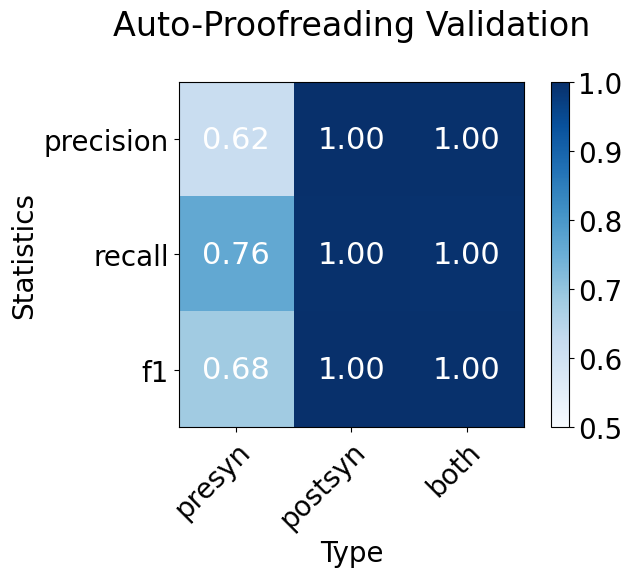

In [14]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [ ]:
# nviz.plot_axon(filt_neuron)

In [ ]:
# import neuron_visualizations as nviz
# nviz.visualize_neuron(filt_neuron,
#                       limb_branch_dict="all")

In [15]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Measuring the Downstream Synaptic Density

In [16]:
filt_neuron.axon_limb_name

'L1'

limb_name = L1
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L1 because was the limb in the first key


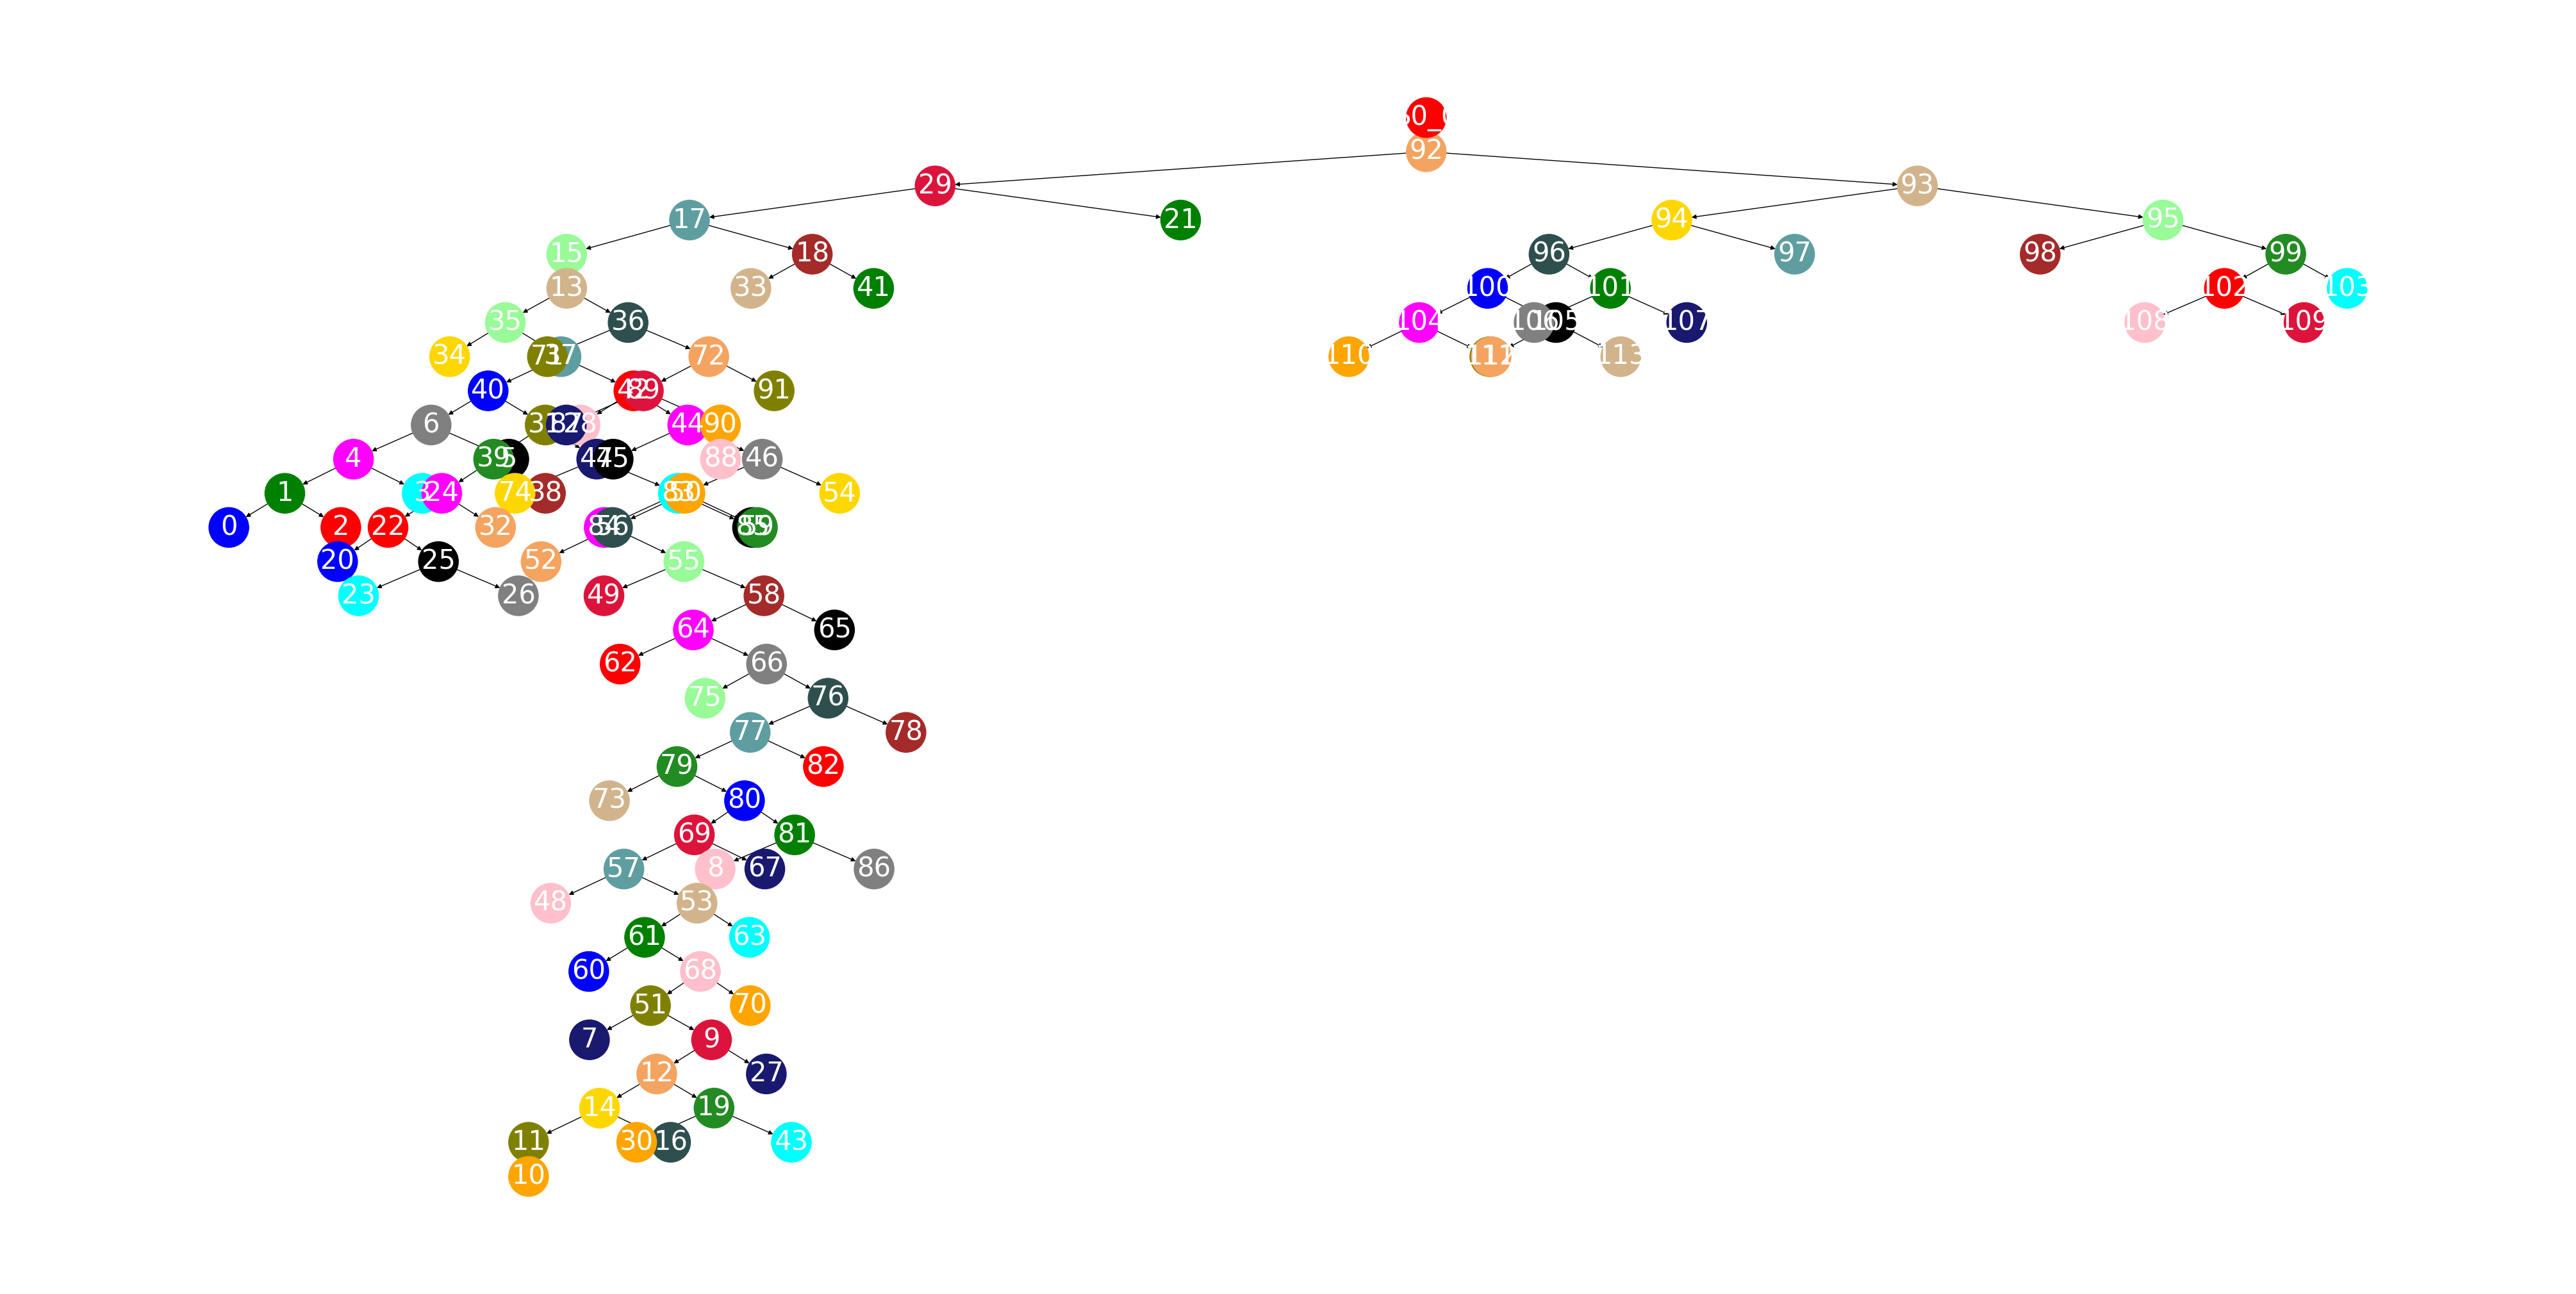

In [17]:
nviz.visualize_neuron_specific_limb(filt_neuron,1)

In [23]:
nru.downstream_nodes(filt_neuron[1],31)

array([39, 47])

In [31]:
filt_neuron[1][43].synapse_density_pre

0.0002672451773396028

In [30]:
au.axon_width(filt_neuron[1][12])

125.4173384446529

In [27]:
import axon_utils as au
curr_branch = filt_neuron[1][47]
curr_web = curr_branch.web
au.valid_web_for_t(curr_web,
                                   size_threshold = 120,
                                   size_type = "ray_trace_median",
                                   above_threshold = True,
                                       verbose=True)

Web size = 213.8141503417977


True

In [28]:
nviz.plot_objects(curr_branch.mesh,
                 meshes = [curr_web],
                 meshes_colors="red")

In [ ]:
limb_obj = filt_neuron[2]
nru.upstream_node(limb_obj,57)

In [ ]:
branch_obj = limb_obj[58]
branch_obj.synapse_density_pre

In [ ]:
branch_obj = limb_obj[57]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[64]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
branch_obj = limb_obj[68]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[69]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
nviz.plot_limb_path(limb_obj,[58,68,69])

In [ ]:
nviz.plot_objects(filt_neuron[2][64].mesh)

In [ ]:
import axon_utils as au

curr_web = curr_branch.web
au.valid_web_for_t(curr_web,
                                   size_threshold = 120,
                                   size_type = "ray_trace_median",
                                   above_threshold = True,
                                       verbose=True)

In [ ]:
curr_branch = filt_neuron[0][4]
nviz.plot_objects(curr_branch.mesh,
                 meshes=[curr_branch.web],
                 meshes_colors="red")

In [ ]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(filt_neuron,
                                    plot_two_downstream_thin_axon_limb_branch  = True,
                                    plot_wide_angled_children = True,
                                    plot_web_errors=True, 
                                     child_skeletal_threshold = 2000,
                                    verbose = True)

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,0)

# Debug 2: Looking at thick T errors

In [ ]:
nru.downstream_nodes(neuron_obj[1],15)

In [ ]:
ed.skip_distance_from_branch_width(neuron_obj[1][15].width)

In [ ]:
neuron_obj[1][20].skeletal_length

In [ ]:
nviz.plot_limb_branch_dict(neuron_obj,dict(L1=[15]))

In [ ]:
au.axon_width(filt_neuron[1][13]),au.axon_width(filt_neuron[1][14])

In [ ]:
import error_detection as ed
ed.thick_t_errors_limb_branch_dict(neuron_obj,
        axon_only = True,
        parent_width_maximum = 70,
        min_child_width_max = 80,
        child_skeletal_threshold = 7000,
        plot_two_downstream_thin_axon_limb_branch = False,
        plot_wide_angled_children = True,
        plot_thick_t_crossing_limb_branch = True,
        plot_t_error_limb_branch = True,
        verbose = True)

# Debug 1: Looking through all of the high degree branching points

In [ ]:
ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                              plot_limb_branch_errors=True,
                                             high_degree_order_verbose=False)

In [ ]:
"""
Pseudocode: 
1) Get the branch names of all those considered for the high degree branching points

"""
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   2)

In [ ]:
nru.upstream_node(limb_obj,24)

In [ ]:
import axon_utils as au
au.axon_width(limb_obj[25])

In [ ]:
limb_obj = filt_neuron[2]
nviz.plot_objects(limb_obj[25].mesh)

In [ ]:
(filt_neuron_2,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)

In [ ]:
nru.downstream_nodes(filt_neuron[1],9)

In [ ]:
limb_obj = filt_neuron[1]
nviz.plot_limb_path(limb_obj,[9,8,7])

In [ ]:
[au.axon_width(limb_obj[k]) for k in [9,8,7]]

In [ ]:
limb_obj[7].skeletal_length

In [ ]:
nviz.plot_objects(filt_neuron[1][43].mesh)

In [ ]:
#branches_to_check = [50,102,121,136,147,152,163,173,224,227,260]
branches_to_check = [53,185,177,154,138,124,115,108,92,14]

In [ ]:
curr_idx = 9

limb_idx = 1
limb_obj = neuron_obj[limb_idx]

curr_branch = branches_to_check[curr_idx] 
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                          limb_idx,
                                          curr_branch,
                                          print_axon_border_info=False,
                                         limb_branch_synapses=True)

In [ ]:
import error_detection as ed


ed.high_degree_upstream_match(limb_obj,
                             branch_idx = curr_branch,
                              plot_starting_branches = True,
                             plot_extracted_skeletons = False,
                             plot_G_local_edge = True,
                              plot_G_global_edge = True,
                              plot_G_node_edge = True,
                              plot_G_exclusive_partner_edge = True,
                              plot_final_branch_matches = True
                             )